In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['18GU','total'])
    lista_twt2.append(twt_ods[date].loc['013B','total'])
    lista_twt3.append(twt_ods[date].loc['021S','total'])
    lista_twt4.append(twt_ods[date].loc['219M','total'])
    lista_twt5.append(twt_ods[date].loc['01CA','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['18GU','total'])
    lista_ine2.append(ine_ods[date].loc['013B','total'])
    lista_ine3.append(ine_ods[date].loc['021S','total'])
    lista_ine4.append(ine_ods[date].loc['219M','total'])
    lista_ine5.append(ine_ods[date].loc['01CA','total'])
    

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,0
2020-04-02,0
2020-04-03,0
2020-04-04,0
2020-04-05,0


In [10]:
df_ine.head()

,Viajes
2020-04-01,3314
2020-04-02,3220
2020-04-03,3934
2020-04-04,3141
2020-04-05,2520


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,1.148148
std,1.467235
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,6.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,4188.802469
std,922.684743
min,2282.000000
25%,3503.000000
50%,4243.000000
75%,4933.000000
max,5827.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,0.800000
2020-05-31,1.548387
2020-06-30,1.050000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,3410.966667
2020-05-31,4262.193548
2020-06-30,5241.800000


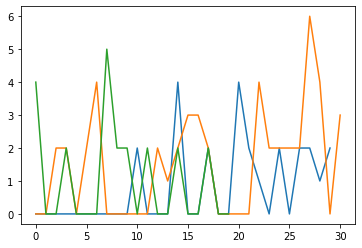

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

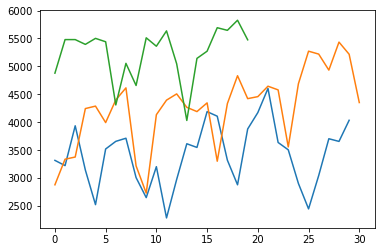

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
# cantidad de dias previos que se usaran para predecir el siguiente dia 
look_back=7

# convertir series en conocimiento supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # secuencia de entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # secuencia del pronostico (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # unimos todo
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # eliminamos todos los valores nulos
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# cargamos el dataframe en la variable values
values_twt = df_twt.values
values_ine = df_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
values_twt=values_twt.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
values_ine=values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_twt = scaler.fit_transform(values_twt)
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

#imprimimos los nuevos datos
reframed_twt.tail()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
76,-0.333333,-0.333333,-1.000000,-0.333333,-1.000000,-1.000000,-0.333333,-1.000000
77,-0.333333,-1.000000,-0.333333,-1.000000,-1.000000,-0.333333,-1.000000,-1.000000
78,-1.000000,-0.333333,-1.000000,-1.000000,-0.333333,-1.000000,-1.000000,-0.333333
79,-0.333333,-1.000000,-1.000000,-0.333333,-1.000000,-1.000000,-0.333333,-1.000000
80,-1.000000,-1.000000,-0.333333,-1.000000,-1.000000,-0.333333,-1.000000,-1.000000


In [22]:
#cambiamos el nombre de las columnas
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)', 'var2(t)']
reframed_ine.tail()

,var2(t-7),var2(t-6),var2(t-5),var2(t-4),var2(t-3),var2(t-2),var2(t-1),var2(t)
76,0.339916,0.822285,0.737095,0.892243,0.559380,-0.013822,0.614105,0.686883
77,0.822285,0.737095,0.892243,0.559380,-0.013822,0.614105,0.686883,0.924401
78,0.737095,0.892243,0.559380,-0.013822,0.614105,0.686883,0.924401,0.897885
79,0.892243,0.559380,-0.013822,0.614105,0.686883,0.924401,0.897885,1.000000
80,0.559380,-0.013822,0.614105,0.686883,0.924401,0.897885,1.000000,0.801975


In [23]:
#unimos los datos del ine con los de twitter
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)
    
reframed = pd.concat([reframed, reframed_ine.iloc[:, 7]], axis=1)

reframed.tail()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var2(t)
76,-0.333333,0.339916,-0.333333,0.822285,-1.000000,0.737095,-0.333333,0.892243,-1.000000,0.559380,-1.000000,-0.013822,-0.333333,0.614105,0.686883
77,-0.333333,0.822285,-1.000000,0.737095,-0.333333,0.892243,-1.000000,0.559380,-1.000000,-0.013822,-0.333333,0.614105,-1.000000,0.686883,0.924401
78,-1.000000,0.737095,-0.333333,0.892243,-1.000000,0.559380,-1.000000,-0.013822,-0.333333,0.614105,-1.000000,0.686883,-1.000000,0.924401,0.897885
79,-0.333333,0.892243,-1.000000,0.559380,-1.000000,-0.013822,-0.333333,0.614105,-1.000000,0.686883,-1.000000,0.924401,-0.333333,0.897885,1.000000
80,-1.000000,0.559380,-1.000000,-0.013822,-0.333333,0.614105,-1.000000,0.686883,-1.000000,0.924401,-0.333333,0.897885,-1.000000,1.000000,0.801975


# Dividimos los datos en sets de entrenamiento y validacion

In [24]:
#dividimos nuestro valores entre sets de entrenamiento y de test
values = reframed.values
n_train_days = 71 - (10+look_back)
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(54, 1, 14) (54,) (20, 1, 14) (20,)


# Creamos la red neuronal

In [25]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(look_back, input_shape=(1,look_back*2),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [26]:
EPOCHS=200

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=look_back)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 7)              105       
_________________________________________________________________
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

Epoch 50/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2577 - mse: 0.1175 - val_loss: 0.2233 - val_mse: 0.0697
Epoch 51/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3310 - mse: 0.1622 - val_loss: 0.2269 - val_mse: 0.0700
Epoch 52/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2473 - mse: 0.0953 - val_loss: 0.2532 - val_mse: 0.0811
Epoch 53/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2518 - mse: 0.1184 - val_loss: 0.2123 - val_mse: 0.0653
Epoch 54/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2556 - mse: 0.1316 - val_loss: 0.1976 - val_mse: 0.0614
Epoch 55/200
8/8 [==============================] - 0s 9ms/step - loss: 0.3244 - mse: 0.1592 - val_loss: 0.2084 - val_mse: 0.0646
Epoch 56/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2631 - mse: 0.1159 - val_loss: 0.2283 - val_mse: 0.0678
Epoch 57/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2616 - mse: 0.11

Epoch 113/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2240 - mse: 0.0882 - val_loss: 0.1707 - val_mse: 0.0613
Epoch 114/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2257 - mse: 0.0835 - val_loss: 0.1873 - val_mse: 0.0561
Epoch 115/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2116 - mse: 0.0727 - val_loss: 0.1651 - val_mse: 0.0546
Epoch 116/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2626 - mse: 0.1157 - val_loss: 0.1677 - val_mse: 0.0500
Epoch 117/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2163 - mse: 0.0720 - val_loss: 0.2035 - val_mse: 0.0531
Epoch 118/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2311 - mse: 0.1029 - val_loss: 0.2203 - val_mse: 0.0580
Epoch 119/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2313 - mse: 0.0890 - val_loss: 0.2160 - val_mse: 0.0559
Epoch 120/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1732 - 

8/8 [==============================] - 0s 8ms/step - loss: 0.2311 - mse: 0.0929 - val_loss: 0.1937 - val_mse: 0.0536
Epoch 176/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2242 - mse: 0.0802 - val_loss: 0.1598 - val_mse: 0.0565
Epoch 177/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2362 - mse: 0.0870 - val_loss: 0.1703 - val_mse: 0.0689
Epoch 178/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2203 - mse: 0.0851 - val_loss: 0.1610 - val_mse: 0.0587
Epoch 179/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2083 - mse: 0.0774 - val_loss: 0.1927 - val_mse: 0.0538
Epoch 180/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2167 - mse: 0.0871 - val_loss: 0.1693 - val_mse: 0.0573
Epoch 181/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2389 - mse: 0.1028 - val_loss: 0.1700 - val_mse: 0.0555
Epoch 182/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1817 - mse: 0.0762 - v

# Visualizamos resultados

In [27]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [28]:
# hacemos las predicciones
trainPredict = model.predict(x_train)
testPredict = model.predict(x_val)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = y_train.reshape(y_train.shape[0], 1)
trainY_scalerInverse = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = y_val.reshape(y_val.shape[0], 1)
testY_scalerInverse = scaler.inverse_transform(testY)

In [29]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse, trainPredict)
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse, testPredict)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 312.35 MAE
Resultado del entrenamiento: 176558.41 MSE
Resultado del entrenamiento: 420.19 RMSE
Resultado del entrenamiento: 10.75 CVRMSE
Resultado del entrenamiento: 9.21 MAPE 

Resultado del test: 315.21 MAE
Resultado del test: 142590.89 MSE
Resultado del test: 377.61 RMSE
Resultado del test: 7.20 CVRMSE
Resultado del test: 6.31 MAPE


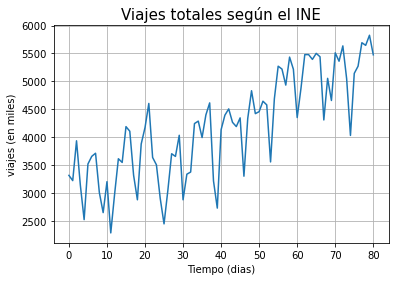

In [30]:
plt.plot(df_ine.values)
plt.grid(True)
plt.title("Viajes totales según el INE", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

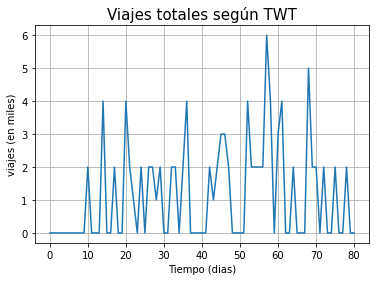

In [31]:
plt.plot(df_twt.values)
plt.grid(True)
plt.title("Viajes totales según TWT", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

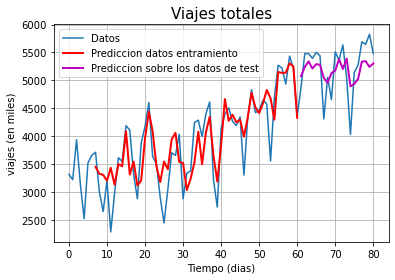

In [32]:
dataset = df_ine.values
dataset = dataset.astype('float32')
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset), :] = testPredict
# plot baseline and predictions
plt.plot(df_ine.values)
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

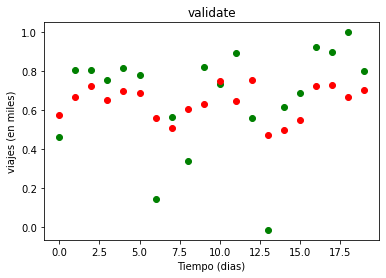

In [33]:
results=model.predict(x_val)

plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

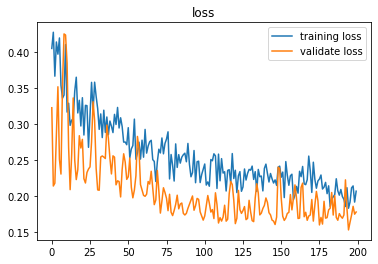

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

# Prediccion a futuro

In [35]:
# usaremos los 14 ultimos dias del confinamiento en junio para predecir como habrian sido los dias del 21 al 27 en caso de que
# el confinamiento se hubiese alargado por una semana mas

ultimosDias_twt = df_twt['2020-6-7':'2020-6-20']
ultimosDias_ine = df_ine['2020-6-7':'2020-6-20']
ultimosDias_twt

,Viajes
2020-06-07,0
2020-06-08,5
2020-06-09,2
2020-06-10,2
2020-06-11,0
2020-06-12,2
2020-06-13,0
2020-06-14,0
2020-06-15,2
2020-06-16,0


# Preparamos los datos para el test

In [36]:
# cargamos el dataframe en la variable values
values_twt = ultimosDias_twt.values
values_ine = ultimosDias_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
values_twt =values_twt.reshape(-1, 1)
scaled_twt = scaler.fit_transform(values_twt)
values_ine =values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

# eliminamos la ultima columna pues es parte de lo que queremos hayar
reframed_twt.drop(reframed_twt.columns[[7]], inplace=True, axis=1)
reframed_ine.drop(reframed_ine.columns[[7]], inplace=True, axis=1)

#unimos los dataframes
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)']
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)

#mostramos el set de entrenamiento
reframed.head(7)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
7,-1.0,-0.690595,1.0,0.139678,-0.2,-0.302170,-0.2,0.649416,-1.0,0.481358,-0.2,0.787424,-1.0,0.130774
8,1.0,0.139678,-0.2,-0.302170,-0.2,0.649416,-1.0,0.481358,-0.2,0.787424,-1.0,0.130774,-1.0,-1.000000
9,-0.2,-0.302170,-0.2,0.649416,-1.0,0.481358,-0.2,0.787424,-1.0,0.130774,-1.0,-1.000000,-0.2,0.238731
10,-0.2,0.649416,-1.0,0.481358,-0.2,0.787424,-1.0,0.130774,-1.0,-1.000000,-0.2,0.238731,-1.0,0.382304
11,-1.0,0.481358,-0.2,0.787424,-1.0,0.130774,-1.0,-1.000000,-0.2,0.238731,-1.0,0.382304,-1.0,0.850863
12,-0.2,0.787424,-1.0,0.130774,-1.0,-1.000000,-0.2,0.238731,-1.0,0.382304,-1.0,0.850863,-0.2,0.798553
13,-1.0,0.130774,-1.0,-1.000000,-0.2,0.238731,-1.0,0.382304,-1.0,0.850863,-0.2,0.798553,-1.0,1.000000


In [37]:
values = reframed.values

#tomamos los valores para realizar el test
x_test = values[6:, :]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 14)


array([[[-1.        ,  0.13077354, -1.        , -1.        ,
         -0.19999999,  0.23873138, -1.        ,  0.3823037 ,
         -1.        ,  0.8508625 , -0.19999999,  0.79855347,
         -1.        ,  1.        ]]], dtype=float32)

In [38]:
#definimos la funcion para realizar el desplazamiento que se hara en el array cada prediccion pues para hacer
#la siguiente prediccion eliminamos el dia mas antiguo, desplazamos un lugar el resto de dias y añadimos el ultimo dia que
#se ha predecido, esto es por que para predecir un dia se usan los 7 dias previos

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

# Predicciones para la proxima semana

In [39]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.          0.13077354 -1.         -1.         -0.19999999
    0.23873138 -1.          0.3823037  -1.          0.8508625
   -0.19999999  0.79855347 -1.          1.        ]]]
[[[ 0.13077354 -1.         -1.         -0.19999999  0.23873138
   -1.          0.3823037  -1.          0.8508625  -0.19999999
    0.79855347 -1.          1.          0.62648344]]]
[[[-1.         -1.         -0.19999999  0.23873138 -1.
    0.3823037  -1.          0.8508625  -0.19999999  0.79855347
   -1.          1.          0.62648344 -0.03279938]]]
[[[-1.         -0.19999999  0.23873138 -1.          0.3823037
   -1.          0.8508625  -0.19999999  0.79855347 -1.
    1.          0.62648344 -0.03279938  0.287803  ]]]
[[[-0.19999999  0.23873138 -1.          0.3823037  -1.
    0.8508625  -0.19999999  0.79855347 -1.          1.
    0.62648344 -0.03279938  0.287803   -0.04756409]]]
[[[ 0.23873138 -1.          0.3823037  -1.          0.8508625
   -0.19999999  0.79855347 -1.          1.          0.62648344
   -0.032

# Re-Convertimos los resultados

In [40]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([0.62648344], dtype=float32), array([-0.03279938], dtype=float32), array([0.287803], dtype=float32), array([-0.04756409], dtype=float32), array([0.48608738], dtype=float32), array([-0.1107199], dtype=float32), array([0.5798031], dtype=float32)]


array([[5491.39526873],
       [4899.02967708],
       [5187.09090023],
       [4885.76359125],
       [5365.24941524],
       [4829.01809712],
       [5449.45299282]])

# Visualizamos el pronostico

<AxesSubplot:>

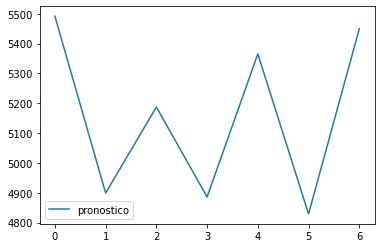

In [41]:
prediccion = pd.DataFrame(inverted)
prediccion.columns = ['pronostico']
prediccion.plot()

# Prediccion con datos actuales

In [42]:
# usaremos 14 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-11':'2020-5-24']
Dias_ine = df_ine['2020-5-11':'2020-5-24']
Dias_twt

,Viajes
2020-05-11,0
2020-05-12,0
2020-05-13,2
2020-05-14,1
2020-05-15,2
2020-05-16,3
2020-05-17,3
2020-05-18,2
2020-05-19,0
2020-05-20,0


# Preparamos los datos para el test

In [43]:
# cargamos el dataframe en la variable values
values_twt = Dias_twt.values
values_ine = Dias_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
values_twt =values_twt.reshape(-1, 1)
scaled_twt = scaler.fit_transform(values_twt)
values_ine =values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

# eliminamos la ultima columna pues es parte de lo que queremos hayar
reframed_twt.drop(reframed_twt.columns[[7]], inplace=True, axis=1)
reframed_ine.drop(reframed_ine.columns[[7]], inplace=True, axis=1)

#unimos los dataframes
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)']
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)

#mostramos el set de entrenamiento
reframed.head(7)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
7,-1.0,0.088062,-1.0,0.428571,0.0,0.574690,-0.5,0.260274,0.0,0.161122,0.5,0.364645,0.5,-1.000000
8,-1.0,0.428571,0.0,0.574690,-0.5,0.260274,0.0,0.161122,0.5,0.364645,0.5,-1.000000,0.0,0.348989
9,0.0,0.574690,-0.5,0.260274,0.0,0.161122,0.5,0.364645,0.5,-1.000000,0.0,0.348989,-1.0,1.000000
10,-0.5,0.260274,0.0,0.161122,0.5,0.364645,0.5,-1.000000,0.0,0.348989,-1.0,1.000000,-1.0,0.463796
11,0.0,0.161122,0.5,0.364645,0.5,-1.000000,0.0,0.348989,-1.0,1.000000,-1.0,0.463796,-1.0,0.510763
12,0.5,0.364645,0.5,-1.000000,0.0,0.348989,-1.0,1.000000,-1.0,0.463796,-1.0,0.510763,-1.0,0.754729
13,0.5,-1.000000,0.0,0.348989,-1.0,1.000000,-1.0,0.463796,-1.0,0.510763,-1.0,0.754729,1.0,0.668623


In [44]:
values = reframed.values

#tomamos los valores para realizar el test
x_test = values[6:, :]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 14)


array([[[ 0.5       , -1.        ,  0.        ,  0.34898853,
         -1.        ,  1.        , -1.        ,  0.46379614,
         -1.        ,  0.51076317, -1.        ,  0.7547293 ,
          1.        ,  0.66862345]]], dtype=float32)

In [45]:
#en la linea 24 definimos la funcion para realizar el desplazamiento que se hara en el array cada prediccion pues para hacer
#la siguiente prediccion eliminamos el dia mas antiguo, desplazamos un lugar el resto de dias y añadimos el ultimo dia que
#se ha predecido, esto es por que para predecir un dia se usan los 7 dias previos, y que usaremos a continuación

# Realizamos la prediccion 

In [46]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 0.5        -1.          0.          0.34898853 -1.
    1.         -1.          0.46379614 -1.          0.51076317
   -1.          0.7547293   1.          0.66862345]]]
[[[-1.          0.          0.34898853 -1.          1.
   -1.          0.46379614 -1.          0.51076317 -1.
    0.7547293   1.          0.66862345  0.34274963]]]
[[[ 0.          0.34898853 -1.          1.         -1.
    0.46379614 -1.          0.51076317 -1.          0.7547293
    1.          0.66862345  0.34274963  0.11691508]]]
[[[ 0.34898853 -1.          1.         -1.          0.46379614
   -1.          0.51076317 -1.          0.7547293   1.
    0.66862345  0.34274963  0.11691508  0.49399367]]]
[[[-1.          1.         -1.          0.46379614 -1.
    0.51076317 -1.          0.7547293   1.          0.66862345
    0.34274963  0.11691508  0.49399367 -0.20676583]]]
[[[ 1.         -1.          0.46379614 -1.          0.51076317
   -1.          0.7547293   1.          0.66862345  0.34274963
    0.11691508  0.49399

# Re-Convertimos los resultados

In [47]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)
inverted

[array([0.34274963], dtype=float32), array([0.11691508], dtype=float32), array([0.49399367], dtype=float32), array([-0.20676583], dtype=float32), array([0.6870598], dtype=float32), array([-0.22664487], dtype=float32), array([0.5893037], dtype=float32)]


array([[4328],
       [4155],
       [4444],
       [3907],
       [4592],
       [3892],
       [4517]])

# Visualizamos el pronostico

<AxesSubplot:>

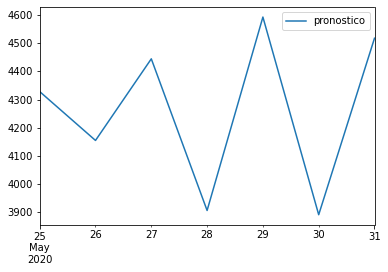

In [48]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [49]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,4688,4328
2020-05-26,5272,4155
2020-05-27,5220,4444
2020-05-28,4933,3907
2020-05-29,5435,4592
2020-05-30,5217,3892
2020-05-31,4351,4517


<AxesSubplot:>

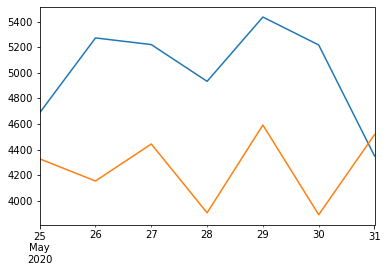

In [50]:
compara['real'].plot()
compara['prediccion'].plot()

In [51]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 801.86 MAE
Resultado del test: 789424.43 MSE
Resultado del test: 888.50 RMSE
Resultado del test: 20.85 CVRMSE
Resultado del test: 19.29 MAPE


In [52]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 360.00 MAE
Resultado del test dia 1: 129600.00 MSE
Resultado del test dia 1: 360.00 RMSE
Resultado del test dia 1: 8.32 CVRMSE
Resultado del test dia 1: 8.32 MAPE 

Resultado del test dia 2: 1117.00 MAE
Resultado del test dia 2: 1247689.00 MSE
Resultado del test dia 2: 1117.00 RMSE
Resultado del test dia 2: 26.88 CVRMSE
Resultado del test dia 2: 26.88 MAPE 

Resultado del test dia 3: 776.00 MAE
Resultado del test dia 3: 602176.00 MSE
Resultado del test dia 3: 776.00 RMSE
Resultado del test dia 3: 17.46 CVRMSE
Resultado del test dia 3: 17.46 MAPE 

Resultado del test dia 4: 1026.00 MAE
Resultado del test dia 4: 1052676.00 MSE
Resultado del test dia 4: 1026.00 RMSE
Resultado del test dia 4: 26.26 CVRMSE
Resultado del test dia 4: 26.26 MAPE 

Resultado del test dia 5: 843.00 MAE
Resultado del test dia 5: 710649.00 MSE
Resultado del test dia 5: 843.00 RMSE
Resultado del test dia 5: 18.36 CVRMSE
Resultado del test dia 5: 18.36 MAPE 

Resultado del test dia 6: 1325.